# Principal Component Analysis

## On fake data

Re-do the example in the exercise set using Python

In [1]:
import numpy as np

In [2]:
# define data


In [3]:
# standardize data


In [4]:
# compute covariance matrix


In [5]:
# compute eigenvalues and eigenvectors


In [6]:
# explain variance


In [7]:
# eigenvectors


In [8]:
# project data


In [9]:
# plot data


Redo without standardization

## On a pizza dataset
Link to data (from data.world): https://data.world/sdhilip/pizza-datasets

Or (from Google Drive): https://drive.google.com/file/d/1w1x2r2FckkdVX9Pte9lTcbjyFTG35T6C/view?usp=sharing

Or (from GitHub): https://github.com/pauldubois98/RefresherMaths2023/blob/main/ExercisesSet5/pizza.csv

![pizza database illustration](pizza.png)

Step -1: Imports libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Step 0: Read data

In [11]:
df = pd.read_csv('pizza.csv')
df.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


Put your data of interest in a matrix `X`

In [12]:
X = df[['mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal']]
X.shape

(300, 7)

Step 1: Standardize data

Step 2: Compute covariance matrix

Step 3: Compute eigenvalues

Compute the explained variance ratio & plot it

Step 4: Compute eigenvectors & sort them

Step 5: Project data onto the first two principal components

Step 6: Plot the projected data

Plot also the contribution of each original feature to the first two principal components

---

Do the same with `PCA` from `sklearn.decomposition`.

In [13]:
from sklearn.decomposition import PCA


The two methods do not give exactly the same results. Why?

if $\vec{u}$ is an eigen vector, $-\vec{u}$ is also an eigen vector;<br>
`sklearn`'s `PCA` returns the eigen vectors with oposite sign as the ones computed `np.linalg.eig`

---

## On the MNIST dataset

![MNIST database illustration](mnist.png)

The MNIST database (Modified National Institute of Standards and Technology database) is a popular database of handwritten digits that is commonly used for training various image processing systems.
It is available from the website of Yann LeCun: http://yann.lecun.com/exdb/mnist/

We will use 10000 images from the test set of the MNIST database.
The images are 28x28 pixels, and each pixel is represented by a number between 0 and 255 (0 is white, 255 is black).

You can get the data in CSV format here:
- Kaggel: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?select=mnist_test.csv
- Google Drive: https://drive.google.com/file/d/1NLZgiKIwEWMOW452Yy6_6fi0AMljQz2p/view?usp=sharing
- GitHub: https://github.com/pauldubois98/RefresherMaths2023/blob/main/ExercisesSet5/mnist10k.csv


The goal of this part is to see how we can use principal component analysis to compress data.

![Compression illustration](compress.png)

Load the `mnist10k.csv` dataset.
Split the labels from the pixels values.

In [14]:
# load data
df = pd.read_csv('mnist10k.csv', sep=',')
df.head()
X = df.drop('label', axis=1)
Y = df['label']
X.shape, Y.shape

((10000, 784), (10000,))

Plot one of the images

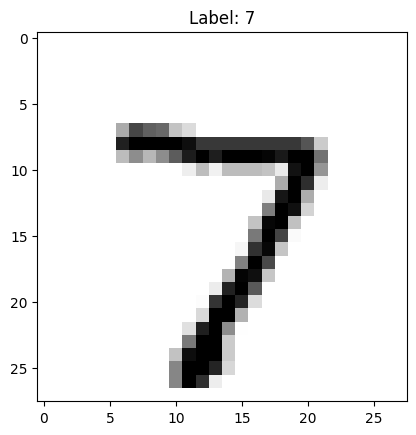

In [15]:
# plot the first image
plt.imshow(X[0:1].values.reshape(28,28), cmap='gray_r')
plt.title(f'Label: {Y[0]}')
plt.show()

Standardize the data to have zero mean and unit variance

In [16]:
# standardize


Perfom PCA on the data with `sklearn.decomposition.PCA`

In [17]:
# do PCA on X


Plot the cumulative explained variance ratio, choose a number of components that explains at least $70\%$ of the variance

In [18]:
# get the variance explained by each component

# plot the cumulative variance explained


$\approx 100$ components are needed to explain $70\%$ of the variance

Perfom a new PCA on the data with `sklearn.decomposition.PCA` with $100$ components

In [19]:
# do PCA on X_STD


Transform the data with the new PCA

In [20]:
# transform data


Reconstruct the data from the transformed data

In [21]:
# reconstruct data

# reapply the mean and std; clip to [0, 255]; convert to uint8


Plot the first 5 images and their reconstruction

Try 30 components, and 300 components. What do you observe?

---

## Application: Genes map Europe
This is an example of a nice application of principal component analysis.

1. Take the DNA genes of Europeans
2. Look at the single nucleotide polymorphism to get an encoding of the DNA of each individual
3. Use PCA to project the individuals in a 2D space
4. Plot the individuals in the 2D space

If you filter out the individuals that have mixed origins, you get the following:

![Genes map Europe](genes_map_europe.png)

More details here: https://www.nature.com/articles/nature07331